In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [9]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul',  seasonal='mul', seasonal_periods=12).fit()

In [13]:
test_predictions = fitted_model.forecast(36)

In [14]:
test_predictions

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

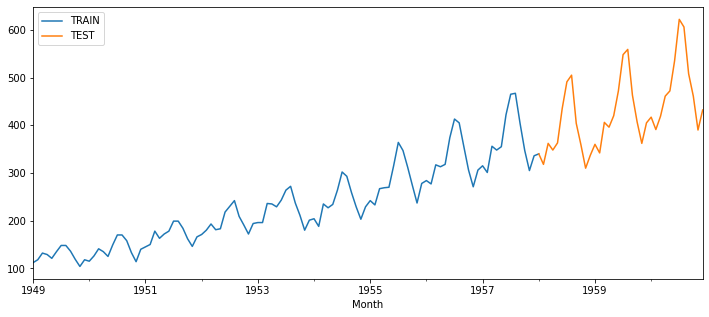

In [19]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

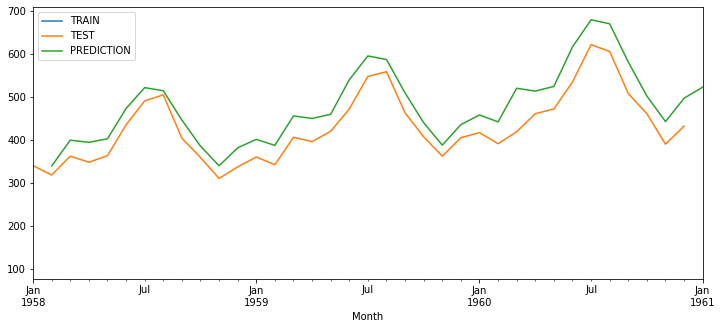

In [21]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1961-01-01'])

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [25]:
print(mean_absolute_error(test_data, test_predictions))
print(mean_squared_error(test_data, test_predictions))

63.03138491847624
5614.4207149269


In [26]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [27]:
forecast_predictions = final_model.forecast(36)

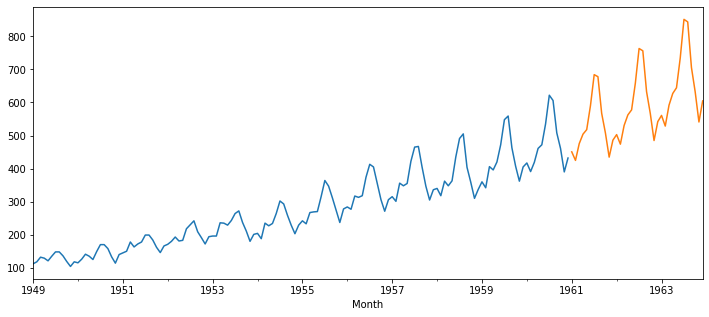

In [30]:
df['Thousands of Passengers'].plot(figsize=(12, 5))
forecast_predictions.plot()

In [32]:
df2 = pd.read_csv('samples.csv', index_col=0, parse_dates=True)

In [33]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


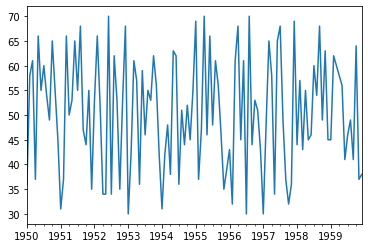

In [34]:
df2['a'].plot()

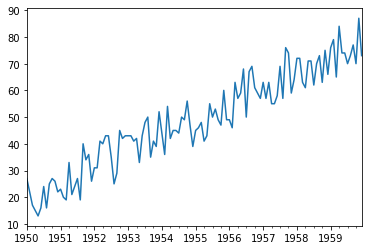

In [35]:
df2['b'].plot()

In [36]:
from statsmodels.tsa.statespace.tools import diff

In [39]:
diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64